## Importing Some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's Have a look at the data

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__The data represents the performance of the students in three subjects: math, reading and writing__
<br/>
All the columns are pretty self explanatory

In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
data[data.isnull() == 'True'].count()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no null values in the dataset**
<br/>
The number of records available is 1000

Text(0.5,1,'Number of males and females in the dataset')

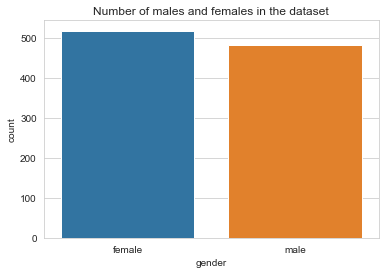

In [5]:
#Number of males and females in the dataset
sns.set_style('whitegrid')
sns.countplot(x=data['gender'])
plt.title('Number of males and females in the dataset')


**The number of females in the dataset is slightly more than the number of males**

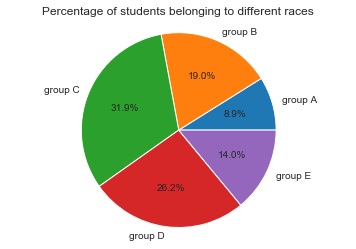

In [6]:
#Race/Ethnicity Pie plot
fig, ax1 = plt.subplots()
x = data.groupby(by=data['race/ethnicity']).count()['lunch']
ax1.pie(x = x, labels = x.index, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title("Percentage of students belonging to different races")
plt.rcParams['font.size'] = 12.0
plt.show()

**Majority of the students belong to group C and group D**

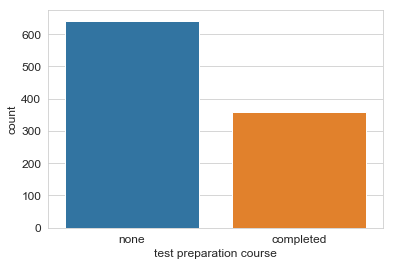

In [7]:
#Number of students who prepared who completed a test prep course
sns.countplot(x = data['test preparation course'])

**We can see that the majority of students do not complete the test prep course**

## Gender based scores

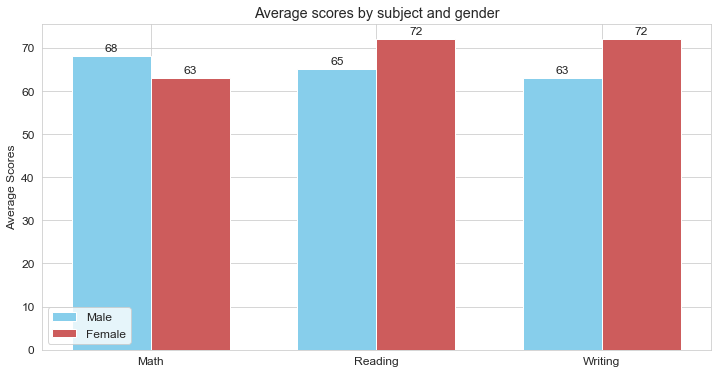

In [8]:
male_means = (int(np.mean(data[data['gender'] == 'male']['math score'])),
              int(np.mean(data[data['gender'] == 'male']['reading score'])),
              int(np.mean(data[data['gender'] == 'male']['writing score'])))

female_means = (int(np.mean(data[data['gender'] == 'female']['math score'])), 
               int(np.mean(data[data['gender'] == 'female']['reading score'])),
               int(np.mean(data[data['gender'] == 'female']['writing score'])))

ind = np.arange(3)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, male_means, width,
                color='SkyBlue', label='Male')
rects2 = ax.bar(ind + width/2, female_means, width,
                color='IndianRed', label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('Math', 'Reading', 'Writing'))
ax.legend(loc=3)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

**From this chart we can see that on an average, men perform better than women at math but when it comes to reading and writing, women perform significantly better than men**

## Test prep course based scores

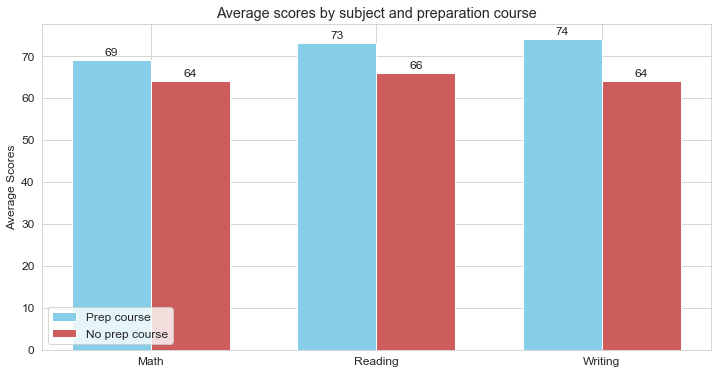

In [9]:
prep_means = (int(np.mean(data[data['test preparation course'] == 'completed']['math score'])),
              int(np.mean(data[data['test preparation course'] == 'completed']['reading score'])),
              int(np.mean(data[data['test preparation course'] == 'completed']['writing score'])))

noprep_means = (int(np.mean(data[data['test preparation course'] == 'none']['math score'])), 
               int(np.mean(data[data['test preparation course'] == 'none']['reading score'])),
               int(np.mean(data[data['test preparation course'] == 'none']['writing score'])))

ind = np.arange(3)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, prep_means, width,
                color='SkyBlue', label='Prep course')
rects2 = ax.bar(ind + width/2, noprep_means, width,
                color='IndianRed', label='No prep course')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and preparation course')
ax.set_xticks(ind)
ax.set_xticklabels(('Math', 'Reading', 'Writing'))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

**We can see that on an average, students who completed a test preparation course performed better in all subjects than students who did not complete them**


### Finding the relationship between taking a prep course, gender and average score for each subject

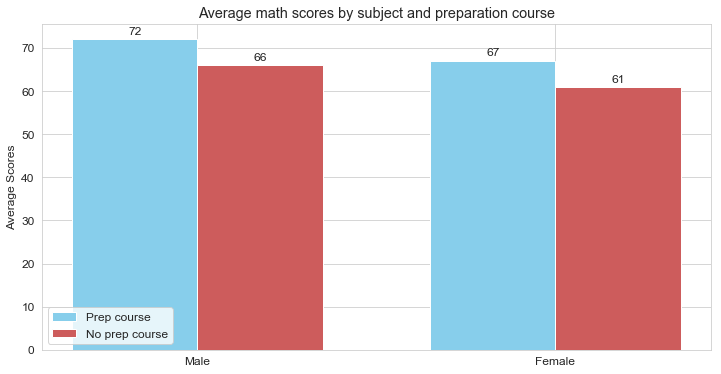

In [10]:
prep_means = (int(np.mean(data[(data['test preparation course'] == 'completed') & (data['gender'] == 'male')]['math score'])),
              int(np.mean(data[(data['test preparation course'] == 'completed') & (data['gender'] == 'female')]['math score'])))

noprep_means = (int(np.mean(data[(data['test preparation course'] == 'none') & (data['gender'] == 'male')]['math score'])),
              int(np.mean(data[(data['test preparation course'] == 'none') & (data['gender'] == 'female')]['math score'])))

ind = np.arange(2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, prep_means, width,
                color='SkyBlue', label='Prep course')
rects2 = ax.bar(ind + width/2, noprep_means, width,
                color='IndianRed', label='No prep course')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average math scores by subject and preparation course')
ax.set_xticks(ind)
ax.set_xticklabels(('Male', 'Female'))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

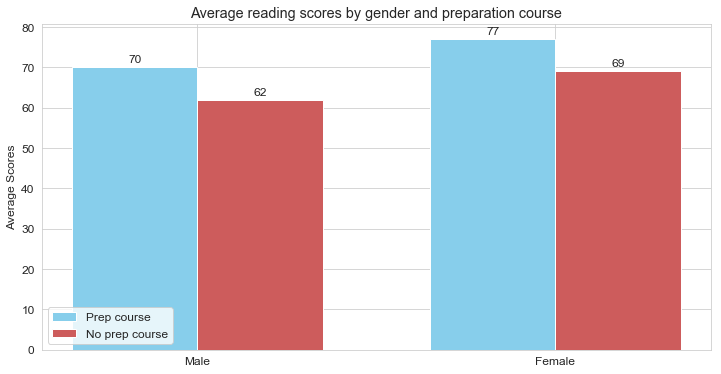

In [11]:
prep_means = (int(np.mean(data[(data['test preparation course'] == 'completed') & (data['gender'] == 'male')]['reading score'])),
              int(np.mean(data[(data['test preparation course'] == 'completed') & (data['gender'] == 'female')]['reading score'])))

noprep_means = (int(np.mean(data[(data['test preparation course'] == 'none') & (data['gender'] == 'male')]['reading score'])),
              int(np.mean(data[(data['test preparation course'] == 'none') & (data['gender'] == 'female')]['reading score'])))

ind = np.arange(2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, prep_means, width,
                color='SkyBlue', label='Prep course')
rects2 = ax.bar(ind + width/2, noprep_means, width,
                color='IndianRed', label='No prep course')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average reading scores by gender and preparation course')
ax.set_xticks(ind)
ax.set_xticklabels(('Male', 'Female'))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

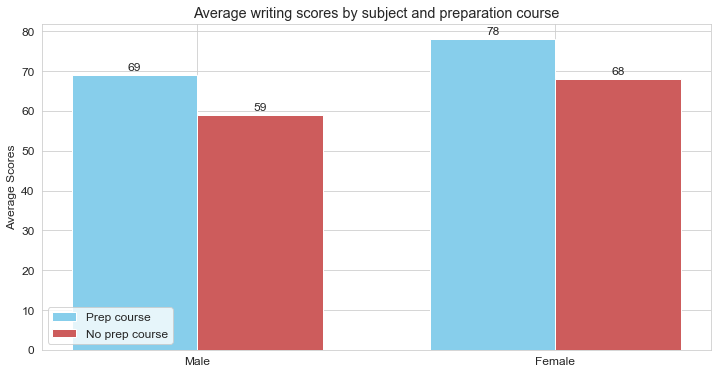

In [12]:
prep_means = (int(np.mean(data[(data['test preparation course'] == 'completed') & (data['gender'] == 'male')]['writing score'])),
              int(np.mean(data[(data['test preparation course'] == 'completed') & (data['gender'] == 'female')]['writing score'])))

noprep_means = (int(np.mean(data[(data['test preparation course'] == 'none') & (data['gender'] == 'male')]['writing score'])),
              int(np.mean(data[(data['test preparation course'] == 'none') & (data['gender'] == 'female')]['writing score'])))

ind = np.arange(2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, prep_means, width,
                color='SkyBlue', label='Prep course')
rects2 = ax.bar(ind + width/2, noprep_means, width,
                color='IndianRed', label='No prep course')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average writing scores by subject and preparation course')
ax.set_xticks(ind)
ax.set_xticklabels(('Male', 'Female'))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

In every subject, for both genders, there is a significant increase in average score stored by students if they took a preparation course

**_Hence, we can conclude that taking a prep course for a subject will most probably increase a student's score_**

## Parent's education level based Scores

In [13]:
parent_edu = round(data.groupby(by = data['parental level of education']).mean(),1)
parent_edu

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.9,70.9,69.9
bachelor's degree,69.4,73.0,73.4
high school,62.1,64.7,62.4
master's degree,69.7,75.4,75.7
some college,67.1,69.5,68.8
some high school,63.5,66.9,64.9


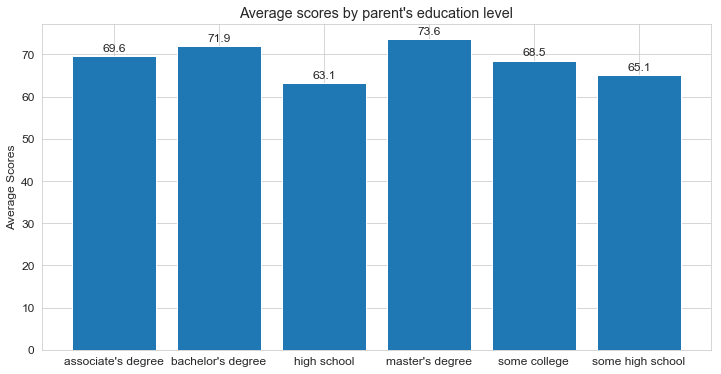

In [14]:
x = list(parent_edu.index)
y = round(parent_edu.mean(axis=1),1)

fig, ax = plt.subplots(figsize=(12,6))

rects = ax.bar(x, y)

ax.set_ylabel('Average Scores')
ax.set_title('Average scores by parent\'s education level')
ax.set_xticklabels((x))

autolabel(rects, 'center')

plt.show()

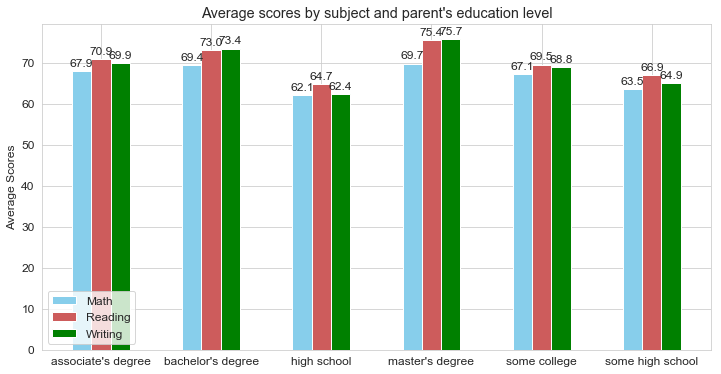

In [15]:
x = parent_edu.index
y1 = parent_edu['math score']
y2 = parent_edu['reading score']
y3 = parent_edu['writing score']

ind = np.arange(6)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, y1, width/2,
                color='SkyBlue', label='Math')
rects2 = ax.bar(ind, y2, width/2,
                color='IndianRed', label='Reading')
rects3 = ax.bar(ind + width/2, y3, width/2,
                color='Green', label='Writing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and parent\'s education level')
ax.set_xticks(ind)
ax.set_xticklabels((x))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

plt.show()

**From the above graph, we can see that students whose parents who went to college, have a bit higher average score than students whose parents have an education level of high school or some high school**
<br/>
<br/>
May be this is because the students whose parents went to college are better able to help their children in their studies
<br/>
<br/>
**_Therefore we can conclude that student's parents who have a degree have a chance of getting better marks_**

## Lunch type at school based scores

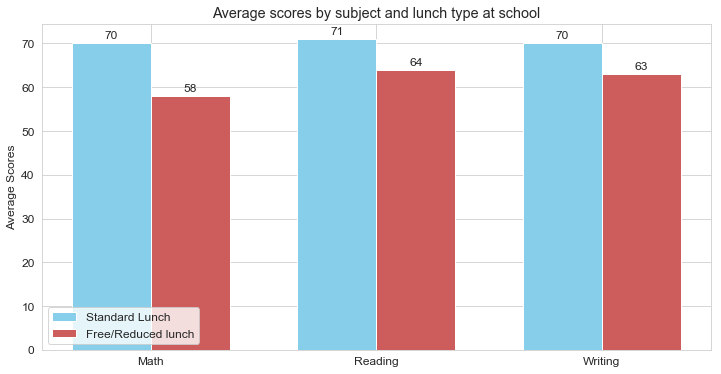

In [16]:
standard_means = (int(np.mean(data[data['lunch'] == 'standard']['math score'])),
              int(np.mean(data[data['lunch'] == 'standard']['reading score'])),
              int(np.mean(data[data['lunch'] == 'standard']['writing score'])))

reduced_means = (int(np.mean(data[data['lunch'] == 'free/reduced']['math score'])), 
               int(np.mean(data[data['lunch'] == 'free/reduced']['reading score'])),
               int(np.mean(data[data['lunch'] == 'free/reduced']['writing score'])))

ind = np.arange(3)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, standard_means, width,
                color='SkyBlue', label='Standard Lunch')
rects2 = ax.bar(ind + width/2, reduced_means, width,
                color='IndianRed', label='Free/Reduced lunch')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and lunch type at school')
ax.set_xticks(ind)
ax.set_xticklabels(('Math', 'Reading', 'Writing'))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")

plt.show()

**Students at schools which have standard lunch prices score significantly more than students at school which have free/reduced price lunch**

One reason for this might be:

- The students who go to schools which provide free/reduced price lunch typically belong to a low income family. So, the students might be working to support their family which would give them less time to study. This can be proved by the below graph. We can see that majority of such students do not complete a test preparation course

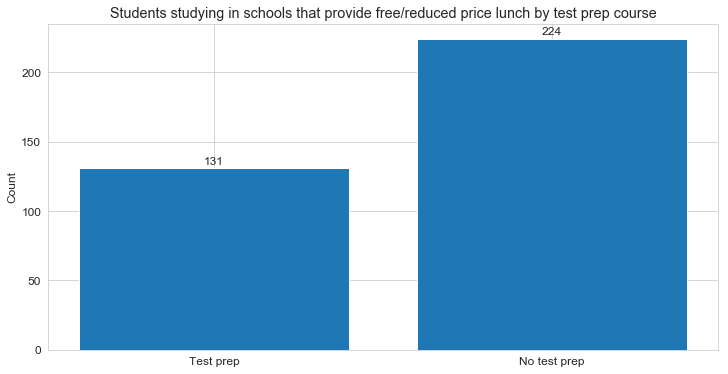

In [17]:
x = ['Test prep', 'No test prep']
y = [data[(data['lunch'] == 'free/reduced') & (data['test preparation course'] == 'completed')]['lunch'].count(),
    data[(data['lunch'] == 'free/reduced') & (data['test preparation course'] == 'none')]['lunch'].count()]

fig, ax = plt.subplots(figsize=(12,6))

rects = ax.bar(x, y)

ax.set_ylabel('Count')
ax.set_title('Students studying in schools that provide free/reduced price lunch by test prep course')
ax.set_xticklabels((x))

autolabel(rects, 'center')

plt.show()

**_Hence we can conclude that a student studying in school that provides free/reduced priced meals scores less than a student studying in a school that provides lunch at standard prices_**

## Race/Ethnicity based scores

In [18]:
race = round(data.groupby(by = data['race/ethnicity']).mean(), 1)
race

,math score,reading score,writing score
race/ethnicity,,,
group A,61.6,64.7,62.7
group B,63.5,67.4,65.6
group C,64.5,69.1,67.8
group D,67.4,70.0,70.1
group E,73.8,73.0,71.4


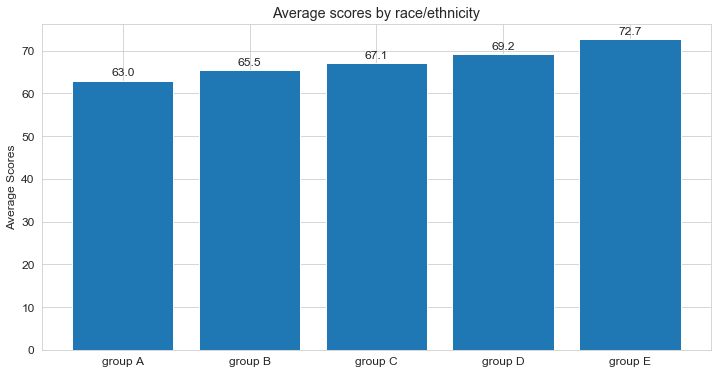

In [19]:
x = list(race.index)
y = round(race.mean(axis=1),1)

fig, ax = plt.subplots(figsize=(12,6))

rects = ax.bar(x, y)

ax.set_ylabel('Average Scores')
ax.set_title('Average scores by race/ethnicity')
ax.set_xticklabels((x))

autolabel(rects, 'center')

plt.show()

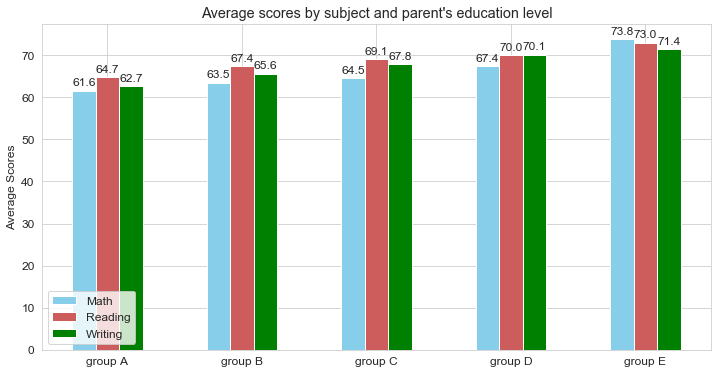

In [20]:
x = race.index
y1 = race['math score']
y2 = race['reading score']
y3 = race['writing score']

ind = np.arange(len(x))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(ind - width/2, y1, width/2,
                color='SkyBlue', label='Math')
rects2 = ax.bar(ind, y2, width/2,
                color='IndianRed', label='Reading')
rects3 = ax.bar(ind + width/2, y3, width/2,
                color='Green', label='Writing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Scores')
ax.set_title('Average scores by subject and parent\'s education level')
ax.set_xticks(ind)
ax.set_xticklabels((x))
ax.legend(loc=3)

autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

plt.show()

**The students belonging to the race/ethnicity Group E have significantly better test scores than others**

**_Therefore we can conclude that students belonging to the race/ethnicity Group E score much higher than the student beloging to group A_**

## Summary

* Male students tend to have a better score in math whereas female students tend to have a better score in reading and writing.
<br/><br/>
* Students who complete a test preparation course on an average have 11% better test scores than those who don't.
<br/><br/>
* The most sigificant improvement in test scores after completing a test preparation course can be seen in writing subject i.e. 15%.
<br/><br/>
* Students whose parents went to some college or have a degree have better scores than the rest. Although, there is not a significant difference.
<br/><br/>
* Students of schools that have free/reduced lunch prices have significantly lower scores than students of schools that have standard lunch prices.
<br/><br/>
* Students belonging to race/ethnicity group E have significantly higher scores thant students of group A.